### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [2]:
data = pd.read_csv("zoo.csv")

### Display the first few rows of the dataset

In [3]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


### Histograms for numerical variables

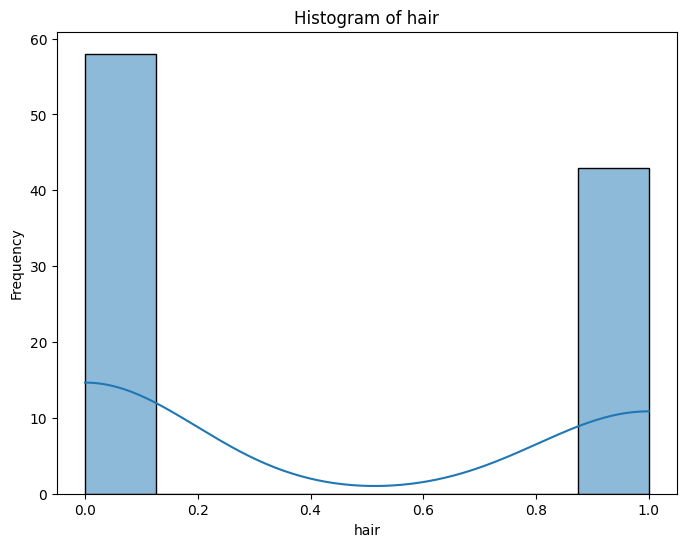

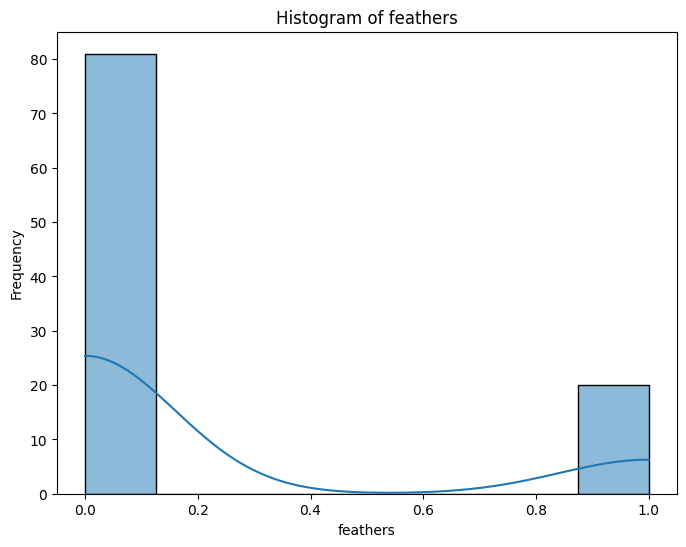

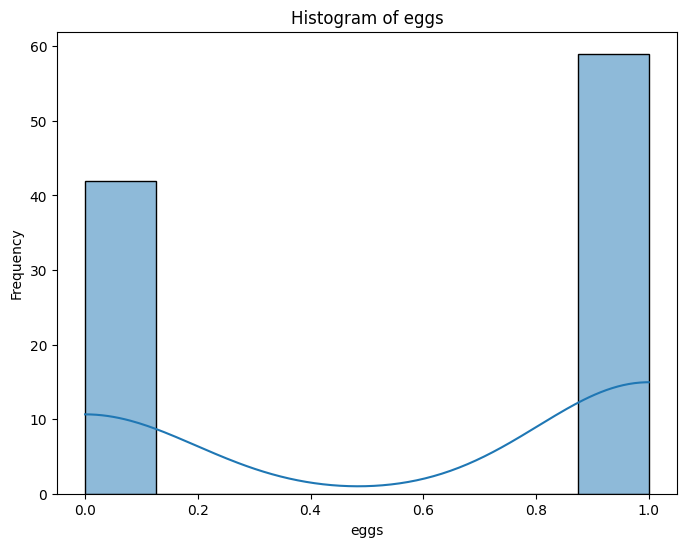

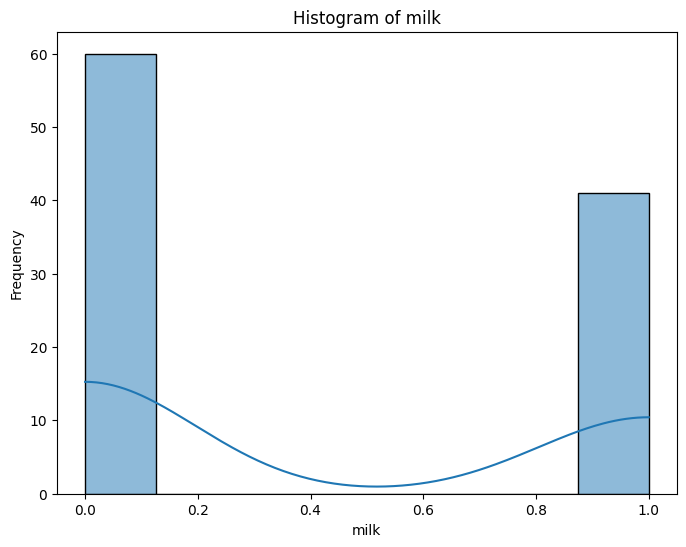

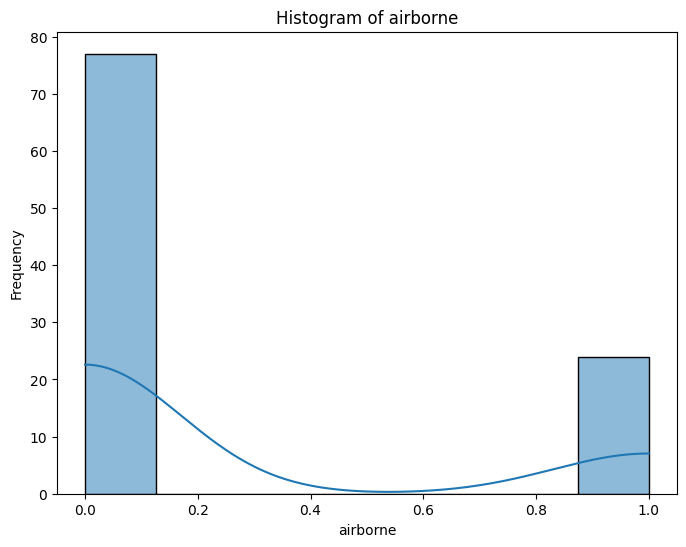

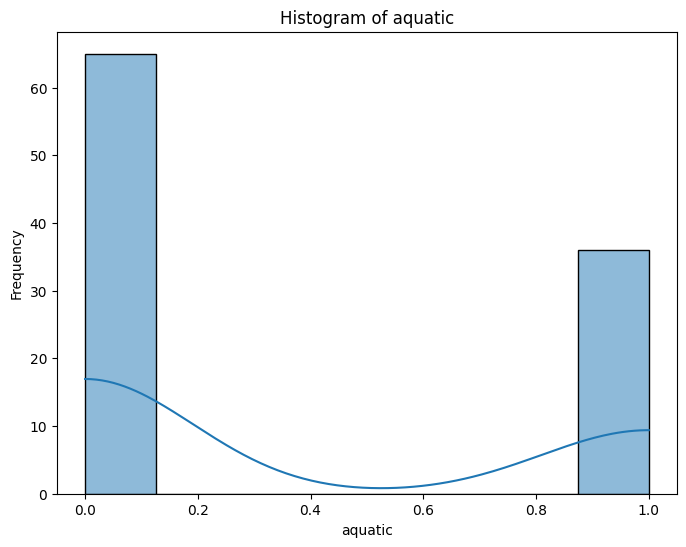

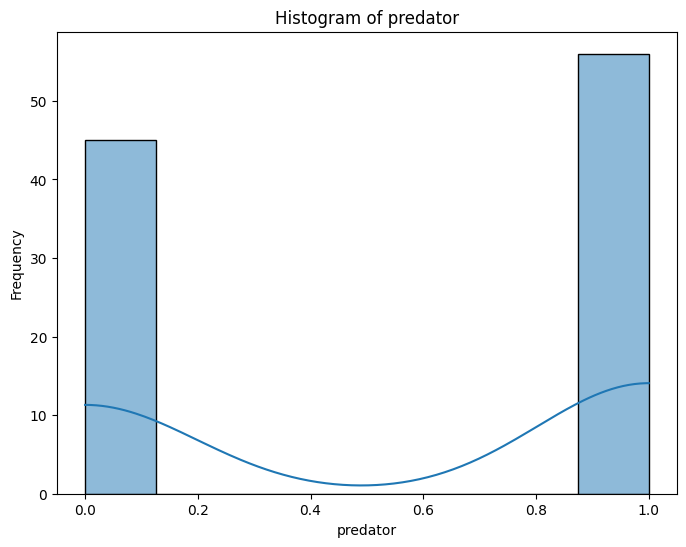

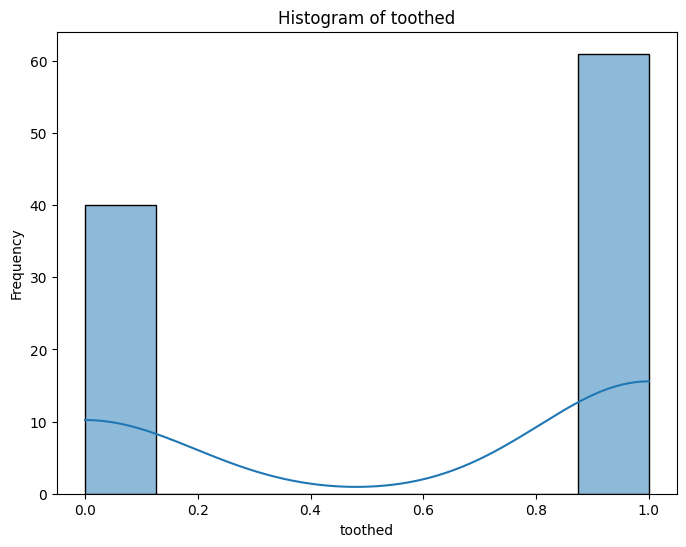

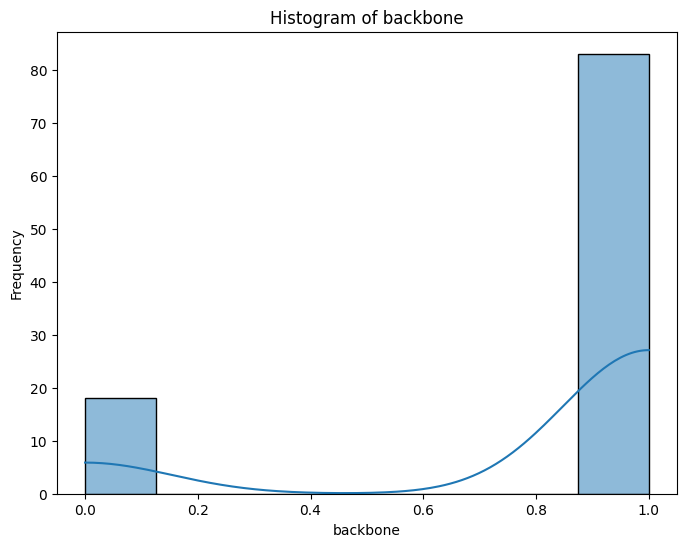

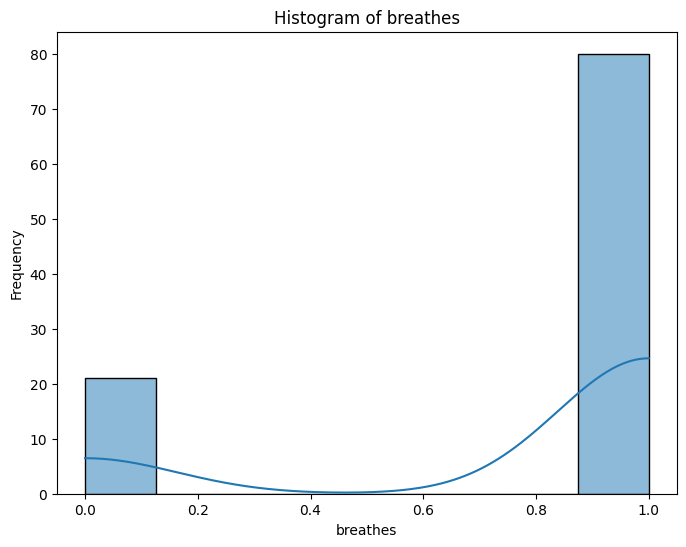

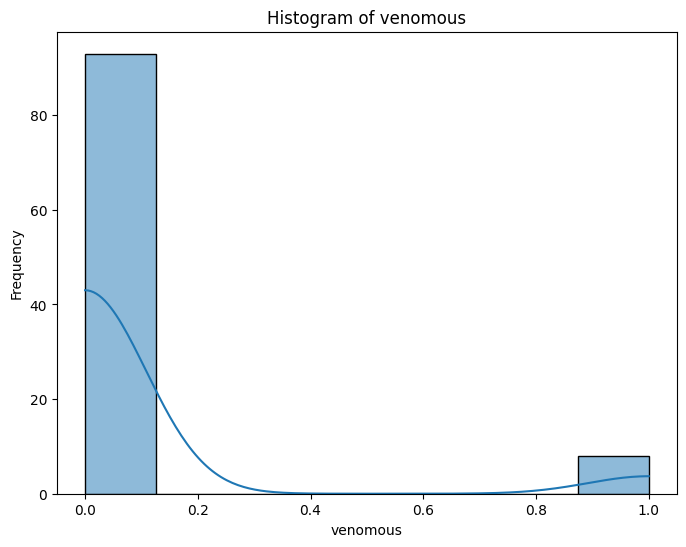

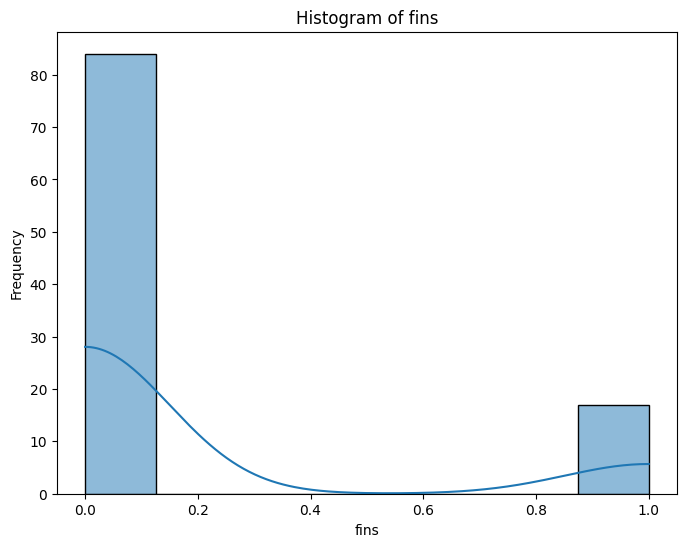

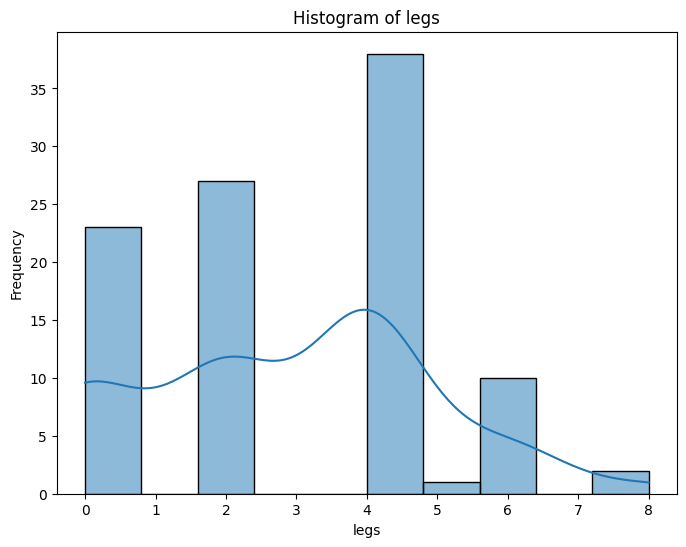

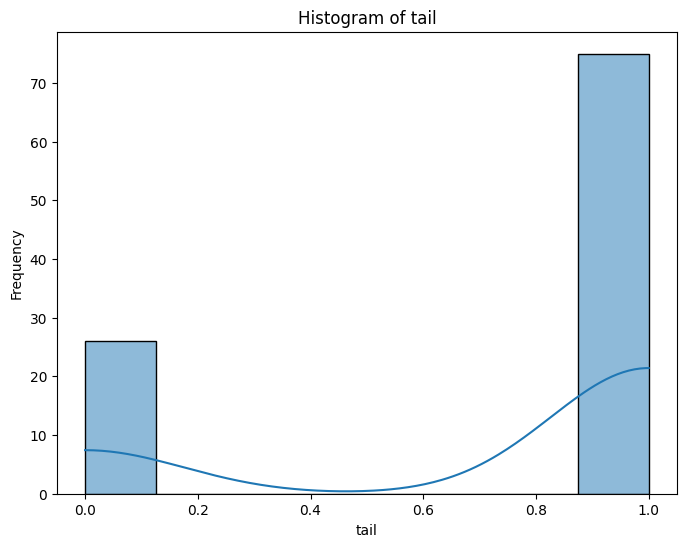

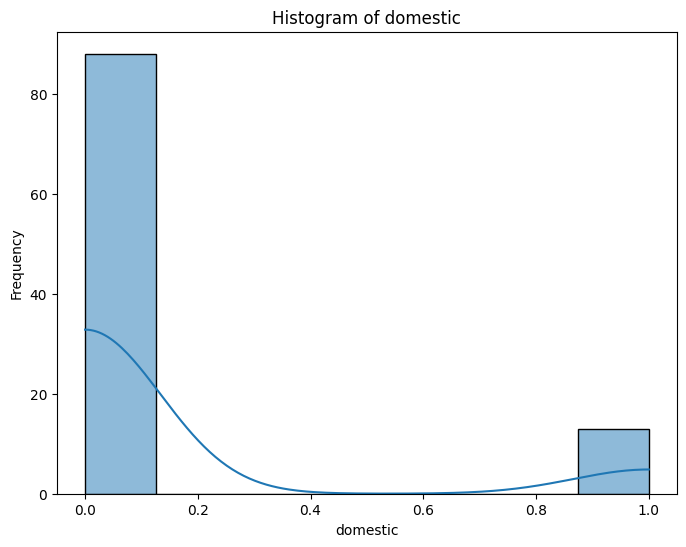

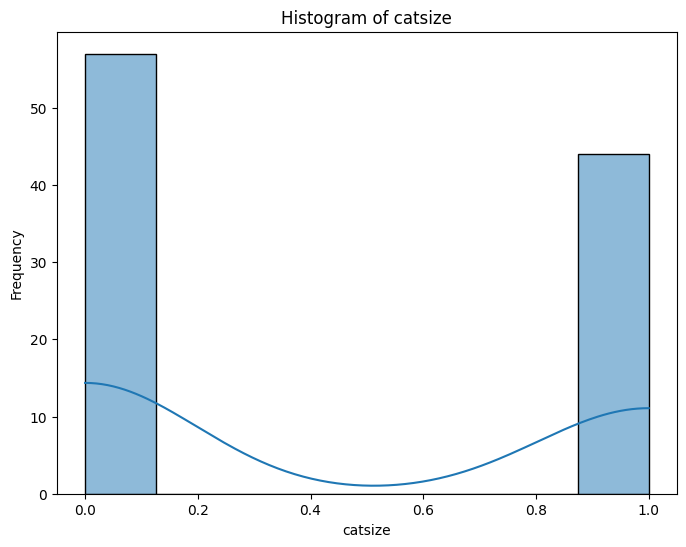

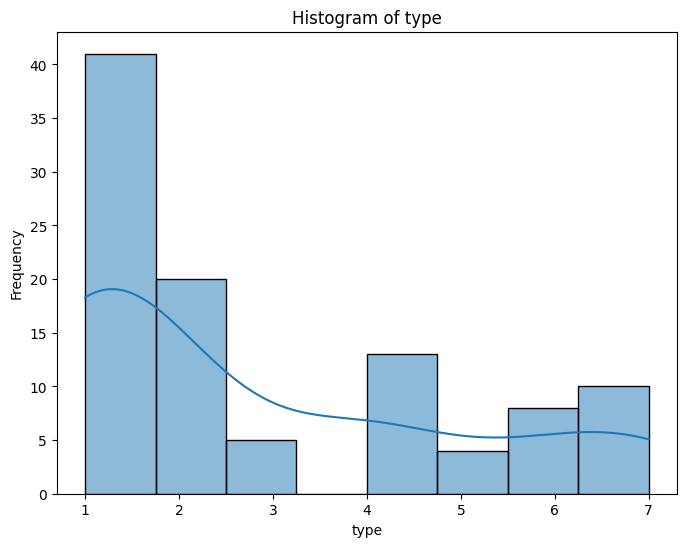

In [5]:
numerical_cols = data.select_dtypes(include=['int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Bar plots for categorical variables with limited categories

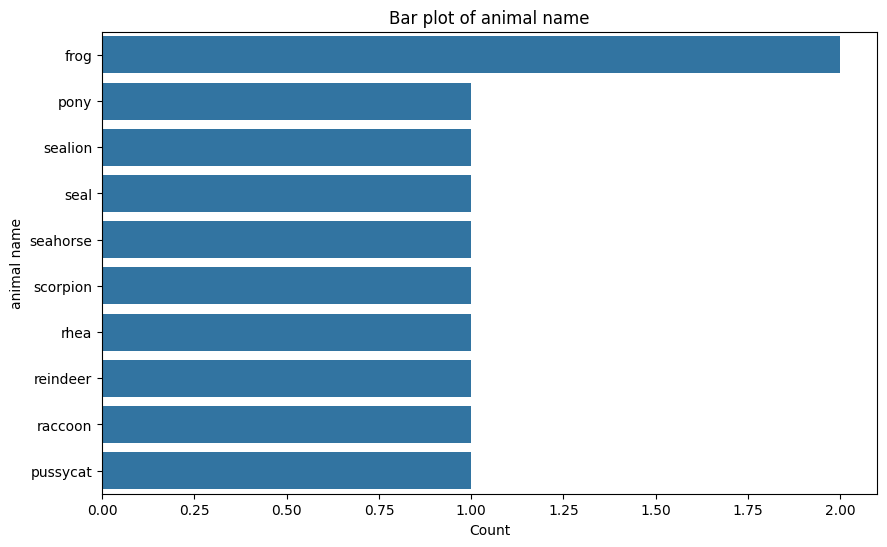

In [6]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    if len(data[col].unique()) > 10:  # Limiting categories if there are too many
        sns.countplot(data=data, y=col, order=data[col].value_counts().index[:10])
    else:
        sns.countplot(data=data, y=col)
    plt.title(f'Bar plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

### Splitting the dataset into features and target variable

In [7]:
X = data.iloc[:, 1:-1]  # Features (excluding animal name and type)
y = data['type']        # Target variable (type)

### Splitting the dataset into training and testing sets (80% training, 20% testing)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)

Shape of training set: (80, 16)
Shape of testing set: (21, 16)


### Standardizing the features

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Implementing the K-Nearest Neighbors algorithm
#### Choosing an appropriate value for K

In [10]:
k = 5

### Initializing the KNN classifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=k)

### Training the classifier

In [12]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Evaluating the classifier's performance on the testing set

In [13]:
y_pred = knn.predict(X_test_scaled)

### Calculating accuracy, precision, recall, and F1-score

In [14]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1-score: 0.9333333333333333


### Hypertuning

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights' : ['uniform', 'distance'],
              'leaf_size' : [20, 30, 40, 50]} 

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with the KNN classifier and parameter grid
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best value of K
grid_search.fit(X_train, y_train)

# Get the best value 
best_k = grid_search.best_params_['n_neighbors']
best_algorithm = grid_search.best_params_['algorithm']
best_weights = grid_search.best_params_['weights']
print("Best value of K:", best_k)
print("Best algorithm:", best_algorithm)
print("Best weights:", best_weights)

# Use the best K to train the KNN classifier
best_params = grid_search.best_params_
print(best_params)
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Evaluate the classifier on the testing set
y_pred = best_knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Best value of K: 3
Best algorithm: auto
Best weights: distance
{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.9523809523809523
Precision: 0.9682539682539681
Recall: 0.9523809523809523
F1-score: 0.9333333333333333


### Visualizing the decision boundaries
#### Concatenate the training and testing sets for dimensionality reduction

In [16]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

### Apply PCA for dimensionality reduction to 2D

In [17]:
pca = PCA(n_components=2)
X_combined_pca = pca.fit_transform(X_combined)

### Fit KNN classifier on the reduced data

In [18]:
best_knn.fit(X_combined_pca, y_combined)

KNeighborsClassifier(leaf_size=20, n_neighbors=3, weights='distance')

### Plot decision regions

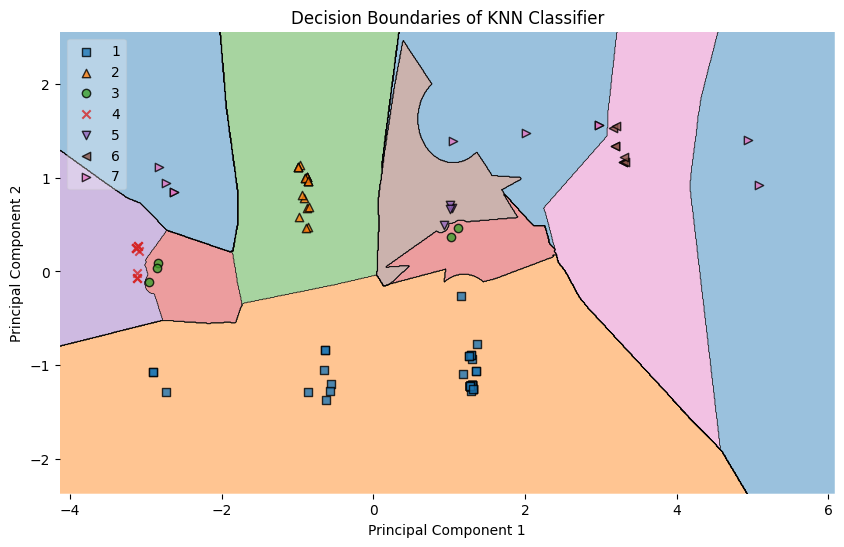

In [19]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_combined_pca, y_combined, clf=best_knn, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of KNN Classifier')
plt.show()

## Interview Questions:
### 1. What are the key hyperparameters in KNN?
Key Hyperparameters in KNN:

Number of neighbors (K): This is the most important hyperparameter in KNN. It determines the number of nearest neighbors to consider when making predictions. Choosing the right value of K is crucial as it can significantly impact the model's performance and generalization ability.

Distance metric: The distance metric determines how the distance between data points is calculated. The choice of distance metric can affect the way the algorithm measures similarity between data points. Common distance metrics include Euclidean distance, Manhattan distance, Minkowski distance, etc.

### 2. What distance metrics can be used in KNN?
Distance Metrics in KNN:
- Euclidean distance: This is the most commonly used distance metric in KNN. It measures the straight-line distance between two points in Euclidean space.

- Manhattan distance: Also known as city block distance or L1 norm, Manhattan distance measures the sum of absolute differences between the coordinates of two points.

- Minkowski distance: Minkowski distance is a generalization of both Euclidean distance and Manhattan distance. It includes a parameter p, where p=1 corresponds to Manhattan distance, and p=2 corresponds to Euclidean distance.

- Chebyshev distance: Chebyshev distance measures the maximum absolute difference between the coordinates of two points along any dimension.

- Hamming distance: Hamming distance is used for categorical data and measures the number of positions at which corresponding symbols are different between two strings of equal length.

- Cosine similarity: While not a distance metric in the strict sense, cosine similarity measures the cosine of the angle between two vectors in a multidimensional space. It is often used for text data or high-dimensional data.